# Derivatives Analytics with Python

In [193]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import norm
from pylab import plt
from matplotlib import style
plt.style.use('classic')
%matplotlib inline


# Chapter 5 : Complete Models 

# 1. European Call and Put Values

In [200]:

# Helper Functions
def dN(x):
    ''' Probability density function of standard normal random variable x. '''
    return math.exp(-0.5 * x ** 2) / math.sqrt(2 * math.pi)

def N(d):
    ''' Cumulative density function of standard normal random variable x. '''
    
    
    return quad(lambda x: dN(x), -20, d, limit=50)[0]

def d1f(S, K, t, T, r, sigma):
    ''' Black-Scholes-Merton d1 function '''
    d1 = (np.log(S/K) + (r + sigma**2/2)*(T-t)) / (sigma*np.sqrt(T-t))
    return d1
def d2f(S, K, t, T, r, sigma):
    ''' Black-Scholes-Merton d2 function '''
    return d1f(S, K, t, T, r, sigma) - sigma*np.sqrt(T-t)
    

# Valuation Functions
def BSM_call_value(S, K, t, T, r, sigma):
    
    ''' Calculates Black-Scholes-Merton European call option value.
    Parameters
    ==========
    S : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    Returns
    =======
    call_value : float
        European call present value at t
    '''
    
    d1 = d1f(S, K, t, T, r, sigma)
    d2 = d1 - sigma * np.sqrt(T-t)
    call_value = S * N(d1) - np.exp(-r * (T -t)) * K * N(d2)
    return call_value


def BSM_put_value(S, K, t, T, r, sigma):
    ''' Calculates Black-Scholes-Merton European put option value.
    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    Returns
    =======
    put_value : float
        European put present value at t
    '''
    put_value = BSM_call_value(S, K, t, T, r, sigma) \
        - S + np.exp(-r * (T - t)) * K
    return put_value

# Plotting European Option Values

def plot_values(function):
    ''' Plots European option values for different parameters c.p. '''
    plt.figure(figsize=(10, 8.3))
    points = 100
    #
    # Model Parameters
    #
    S = 100.0  # index level
    K = 100.0  # option strike
    t = 0.0  # valuation date
    T = 1.0  # maturity date
    r = 0.05  # risk-less short rate
    sigma = 0.2  # volatility

    # C(K) plot
    plt.subplot(221)
    klist = np.linspace(80, 120, points)
    vlist = [function(S, K, t, T, r, sigma) for K in klist]
    plt.plot(klist, vlist)
    plt.grid()
    plt.xlabel('strike $K$')
    plt.ylabel('present value')

    # C(T) plot
    plt.subplot(222)
    tlist = np.linspace(0.0001, 1, points)
    vlist = [function(S, K, t, T, r, sigma) for T in tlist]
    plt.plot(tlist, vlist)
    plt.grid(True)
    plt.xlabel('maturity $T$')

    # C(r) plot
    plt.subplot(223)
    rlist = np.linspace(0, 0.1, points)
    vlist = [function(S, K, t, T, r, sigma) for r in rlist]
    plt.plot(tlist, vlist)
    plt.grid(True)
    plt.xlabel('short rate $r$')
    plt.ylabel('present value')
    plt.axis('tight')

    # C(sigma) plot
    plt.subplot(224)
    slist = np.linspace(0.01, 0.5, points)
    vlist = [function(S, K, t, T, r, sigma) for sigma in slist]
    plt.plot(slist, vlist)
    plt.grid(True)
    plt.xlabel('volatility $\sigma$')
    plt.tight_layout()

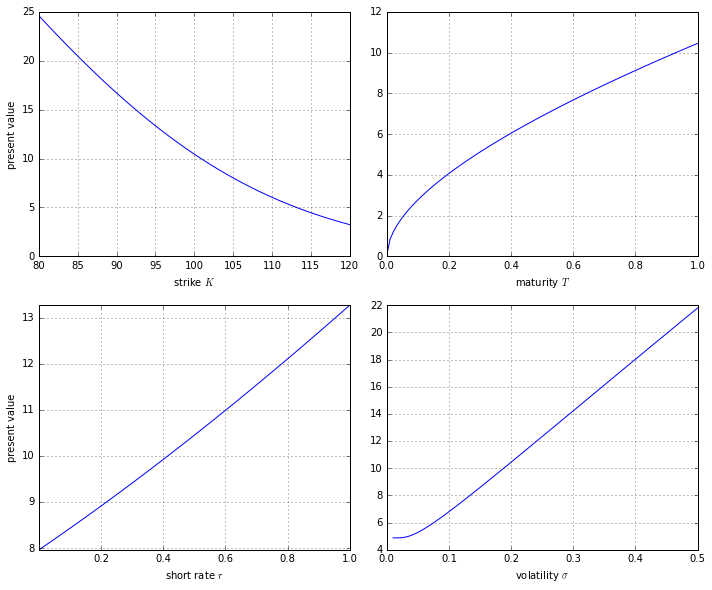

In [35]:
plot_values(BSM_call_value)

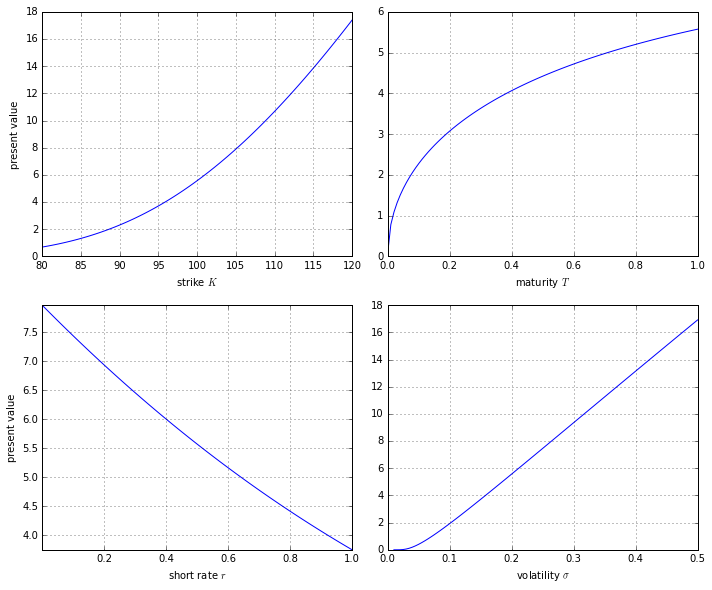

In [36]:
plot_values(BSM_put_value)

In [210]:
S=100.0    # spot stock price
K=100.0     # strike
T=1.0       # maturity 
r=0.1       # risk free rate 
sigma=0.2     # diffusion coefficient or volatility
d1 = (np.log(S/K) + (r + sigma**2/2)*(T-t)) / (sigma*np.sqrt(T-t))
d2= d1 - sigma * np.sqrt(T-t)
call_value = S * N(d1) - np.exp(-r * (T -t)) * K * N(d2)
put_value= call_value \
        - S + np.exp(-r * (T - t)) * K
print("Call price: ", call_value )  
print("Put price: ", put_value ) 

Call price:  13.269676584660871
Put price:  3.7534183882568186


# Put-Call Parity 

Call-Put = S0 - Ke^-rt

In [209]:
print(call_value) 
print(put_value + S - K * np.exp(-r*T) )

13.269676584660871
13.269676584660871


# Example

Let’s assume that our strike is 50, then a put option will have it’s highest value to us when the stock is worth 0 as we could buy stock at 0 and then exercise our put option to sell for 50\$. A call is the opposite to put, our option to buy is worth the least if the stock price is 0 and will increase in value as the stock price increases. 
Assuming r=10\%, sigma=0.5, K=50, T=10 years

<ipython-input-165-e3b7b8f46549>:12: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S/K) + (r + sigma**2/2)*(T-t)) / (sigma*np.sqrt(T-t))


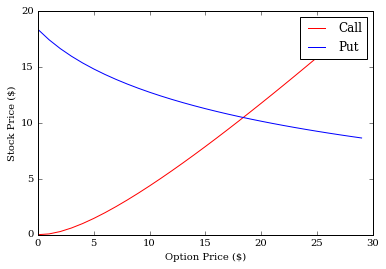

In [166]:
S = np.arange(0, 30)
vals_call = [BSM_call_value(x, 50, 0, 10, 0.10, 0.5) for x in S]
vals_put = [BSM_put_value(x, 50,0, 10,0.10, 0.5) for x in S]
plt.plot(S,vals_call, 'r', label = "Call")
plt.plot(S, vals_put, 'b', label  = "Put")
plt.legend()
plt.ylabel("Stock Price ($)")
plt.xlabel("Option Price ($)")
plt.show()

# 2. Greeks

Greeks are typically used as a risk measure on a portfolio of options. One would seek to manage their portfolio greeks within given risk appetites i.e. delta hedging.

#  European Call Option Greeks

In [167]:
# Black-Scholes-Merton (1973) European Call Option Greeks
# 05_com/BSM_call_greeks.py
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
#from BSM_option_valuation import d1f, N, dN
import scipy.stats as scistat
mpl.rcParams['font.family'] = 'serif'
# Functions for Greeks
def BSM_delta(S, K, t, T, r, sigma):
    ''' Black-Scholes-Merton DELTA of European call option.
    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    Returns
    =======
    delta : float
        European call option DELTA
    '''
    
       
    return scistat.norm.cdf(d1f(S, K, t, T, r, sigma))


def BSM_gamma(S, K, t, T, r, sigma):
    ''' Black-Scholes-Merton GAMMA of European call option.
    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    Returns
    =======
    gamma : float
        European call option GAMM
    '''
    return scistat.norm.pdf(d1f(S, K, t, T, r, sigma))/(S*sigma*np.sqrt(T))
    return gamma


def BSM_theta(S, K, t, T, r, sigma):
    ''' Black-Scholes-Merton THETA of European call option.
    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    Returns
    =======
    theta : float
        European call option THETA
    '''
    aux1 = -S*scistat.norm.pdf(d1f(S, K, t, T, r, sigma))*sigma/(2*np.sqrt(T-t))
    aux2 = -r*K*np.exp(-r*(T-t))*scistat.norm.cdf(d2f(S, K, t, T, r, sigma))
    return aux1+aux2


def BSM_rho(S, K, t, T, r, sigma):
    ''''Call: ρ=K(T−t)e−r(T−t)N(d2)'''
    ''' Black-Scholes-Merton RHO of European call option.
    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    Returns
    =======
    rho : float
        European call option RHO
    '''
    return K*T*np.exp(-r*T)*scistat.norm.cdf(d2f(S, K, t, T, r, sigma))


def BSM_vega(S, K, t, T, r, sigma):
    ''' Black-Scholes-Merton VEGA of European call option.
    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    Returns
    =======
    vega : float
        European call option VEGA
    '''
    return S*scistat.norm.pdf(d1f(S, K, t, T, r, sigma))*np.sqrt(T-t)
# Plotting the Greeks
def plot_greeks(function, greek):
    # Model Parameters
    St = 100.0  # index level
    r = 0.05  # risk-less short rate
    sigma = 0.2  # volatility
    t = 0.0  # valuation date

    # Greek Calculations
    tlist = np.linspace(0.01, 1, 25)
    klist = np.linspace(80, 120, 25)
    V = np.zeros((len(tlist), len(klist)), dtype=np.float)
    for j in range(len(klist)):
        for i in range(len(tlist)):
            V[i, j] = function(St, klist[j], t, tlist[i], r, sigma)

    # 3D Plotting
    x, y = np.meshgrid(klist, tlist)
    fig = plt.figure(figsize=(9, 5))
    plot = p3.Axes3D(fig)
    plot.plot_wireframe(x, y, V)
    plot.set_xlabel('strike $K$')
    plot.set_ylabel('maturity $T$')
    plot.set_zlabel('%s(K, T)' % greek)

<ipython-input-94-4c6876aab388>:76: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  V = np.zeros((len(tlist), len(klist)), dtype=np.float)


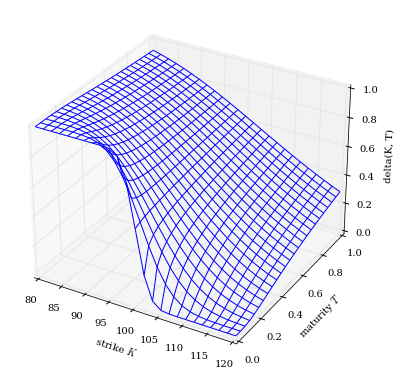

In [105]:
plot_greeks(BSM_delta, 'delta')

<ipython-input-94-4c6876aab388>:76: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  V = np.zeros((len(tlist), len(klist)), dtype=np.float)


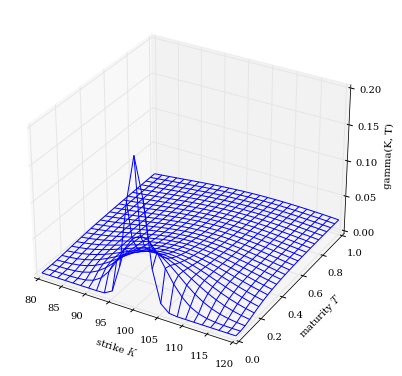

In [108]:
plot_greeks(BSM_gamma, 'gamma')

<ipython-input-94-4c6876aab388>:76: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  V = np.zeros((len(tlist), len(klist)), dtype=np.float)


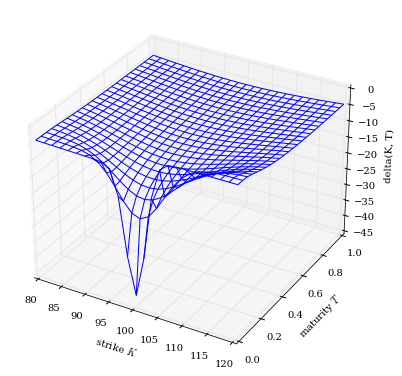

In [107]:
plot_greeks(BSM_theta, 'theta')

<ipython-input-94-4c6876aab388>:76: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  V = np.zeros((len(tlist), len(klist)), dtype=np.float)


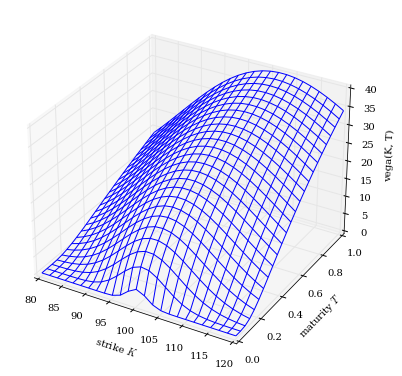

In [112]:
plot_greeks(BSM_vega, 'vega')

<ipython-input-167-ebf3d914ffef>:147: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  V = np.zeros((len(tlist), len(klist)), dtype=np.float)


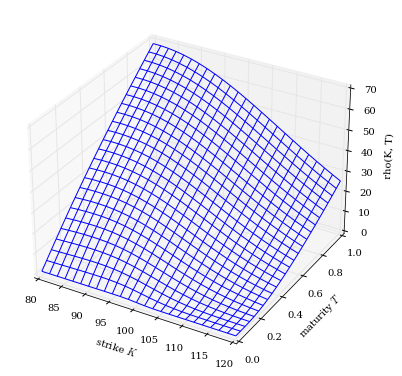

In [168]:
plot_greeks(BSM_rho, 'rho')

# European Put Option Greeks

In [169]:
# Black-Scholes-Merton (1973) European Put Option Greeks
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
#from BSM_option_valuation import d1f, N, dN
import scipy.stats as scistat
mpl.rcParams['font.family'] = 'serif'

#
# Functions for Greeks
def BSM_delta_put(S, K, t, T, r, sigma):
    ''' Black-Scholes-Merton DELTA of European call option.
    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    Returns
    =======
    delta : float
        European call option DELTA
    '''
    #d1 = d1f(St, K, t, T, r, sigma)
    #delta = N(d1)
    return scistat.norm.cdf(d1f(S, K, t, T, r, sigma)) -1


def BSM_gamma_put(S, K, t, T, r, sigma):
    #d1 = d1f(St, K, t, T, r, sigma)
    #gamma = dN(d1) / (St * sigma * math.sqrt(T - t))
    return scistat.norm.pdf(d1f(S, K, t, T, r, sigma))/(S*sigma*np.sqrt(T))


def BSM_theta_put(S, K, t, T, r, sigma):
    aux1 = -S*scistat.norm.pdf(d1f(S, K, t, T, r, sigma))*sigma/(2*np.sqrt(T-t))
    aux2 = r*K*np.exp(-r*(T-t))*scistat.norm.cdf(-1*d2f(S, K, t, T, r, sigma))
    return aux1 + aux2


def BSM_rho_put(S, K, t, T, r, sigma):
    
    return -K*T*np.exp(-r*(T-t))*scistat.norm.cdf(d2f(S, K, t, T, r, sigma))



def BSM_vega_put(S, K, t, T, r, sigma):
    #d1 = d1f(St, K, t, T, r, sigma)
    #vega = St * dN(d1) * math.sqrt(T - t)
    return S*scistat.norm.pdf(d1f(S, K, t, T, r, sigma))*np.sqrt(T-t)

# Plotting the Greeks
def plot_greeks(function, greek):
    # Model Parameters
    St = 100.0  # index level
    r = 0.05  # risk-less short rate
    sigma = 0.2  # volatility
    t = 0.0  # valuation date

    # Greek Calculations
    tlist = np.linspace(0.01, 1, 25)
    klist = np.linspace(80, 120, 25)
    V = np.zeros((len(tlist), len(klist)), dtype=np.float)
    for j in range(len(klist)):
        for i in range(len(tlist)):
            V[i, j] = function(St, klist[j], t, tlist[i], r, sigma)

    # 3D Plotting
    x, y = np.meshgrid(klist, tlist)
    fig = plt.figure(figsize=(9, 5))
    plot = p3.Axes3D(fig)
    plot.plot_wireframe(x, y, V)
    plot.set_xlabel('strike $K$')
    plot.set_ylabel('maturity $T$')
    plot.set_zlabel('%s(K, T)' % greek)

<ipython-input-117-4c6876aab388>:76: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  V = np.zeros((len(tlist), len(klist)), dtype=np.float)


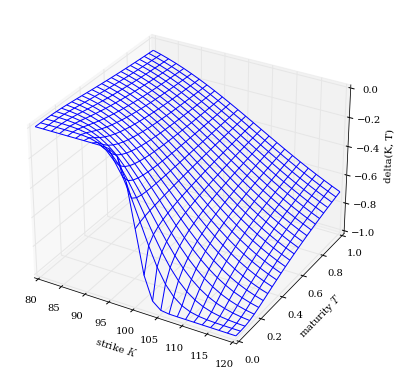

In [118]:
plot_greeks(BSM_delta_put, 'delta')

<ipython-input-169-ac384317c507>:76: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  V = np.zeros((len(tlist), len(klist)), dtype=np.float)


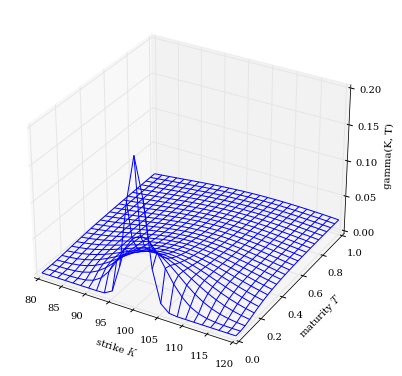

In [170]:
plot_greeks(BSM_gamma_put, 'gamma')

<ipython-input-122-ac384317c507>:76: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  V = np.zeros((len(tlist), len(klist)), dtype=np.float)


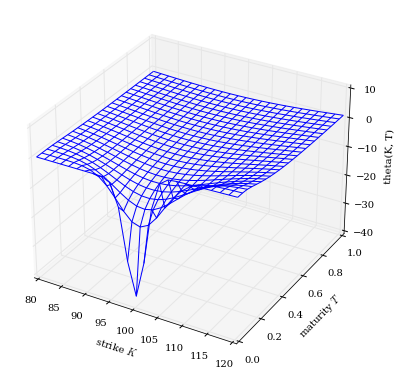

In [124]:
plot_greeks(BSM_theta_put, 'theta')

<ipython-input-169-ac384317c507>:76: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  V = np.zeros((len(tlist), len(klist)), dtype=np.float)


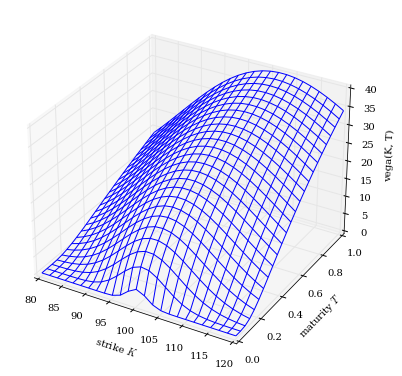

In [171]:
plot_greeks(BSM_vega_put, 'vega')

<ipython-input-122-ac384317c507>:76: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  V = np.zeros((len(tlist), len(klist)), dtype=np.float)


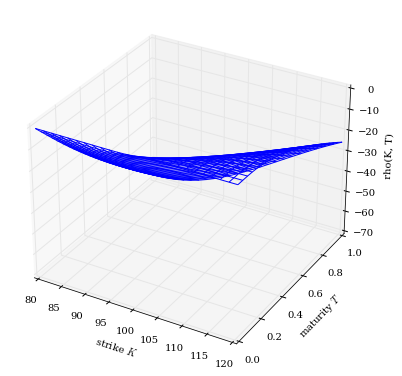

In [125]:
plot_greeks(BSM_rho_put, 'rho')

# 3. Binomial Option Pricing

Cox Rubinstein Binomial Model

In [172]:
# Cox-Ross-Rubinstein Binomial Model
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rcParams['font.family'] = 'serif'
#from BSM_option_valuation import BSM_call_value
# Model Parameters
S0 = 100.0  # index level
K = 105.0  # option strike
T = 1.0  # maturity date
r = 0.05  # risk-less short rate
sigma = 0.5  # volatility


# Valuation Function
def CRR_option_value(S0, K, T, r, sigma, otype, M=4):
    ''' Cox-Ross-Rubinstein European option valuation.
    Parameters
    ==========
    S0 : float
        stock/index level at time 0
    K : float
        strike price
    T : float
        date of maturity
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    otype : string
        either 'call' or 'put'
    M : int
        number of time intervals
    '''
    # Time Parameters
    dt = T / M  # length of time interval
    df = np.exp(-r * dt)  # discount per interval

    # Binomial Parameters
    u = np.exp(sigma * np.sqrt(dt))  # up movement
    d = np.exp( -sigma * np.sqrt(dt) )  # down movement
    q = (np.exp(r * dt) - d) / (u - d)  # martingale branch probability

    # Array Initialization for Index Levels
    mu = np.arange(M + 1)
    mu = np.resize(mu, (M + 1, M + 1))
    md = np.transpose(mu)
    mu = u ** (mu - md)
    md = d ** md
    S = S0 * mu * md

    # Inner Values
    if otype == 'call':
        V = np.maximum(S - K, 0)  # inner values for European call option
    else:
        V = np.maximum(K - S, 0)  # inner values for European put option

    z = 0
    for t in range(M - 1, -1, -1):  # backwards iteration
        V[0:M - z, t] = (q * V[0:M - z, t + 1] +
                         (1 - q) * V[1:M - z + 1, t + 1]) * df
        z += 1
    return V[0, 0]


def plot_convergence_call(mmin, mmax, step_size):
    ''' Plots the CRR option values for increasing number of time
    intervals M against the Black-Scholes-Merton benchmark value.'''
    BSM_benchmark = BSM_call_value(S0, K, 0, T, r, sigma)
    m = range(mmin, mmax, step_size)
    CRR_values = [CRR_option_value(S0, K, T, r, sigma, 'call', M) for M in m]
    plt.figure(figsize=(9, 5))
    plt.plot(m, CRR_values, label='CRR values')
    plt.axhline(BSM_benchmark, color='r', ls='dashed', lw=1.5,
                label='BSM benchmark')
    plt.xlabel('# of binomial steps $M$')
    plt.ylabel('European call option value')
    plt.legend(loc=4)
    plt.xlim(0, mmax)
    

def plot_convergence_put(mmin, mmax, step_size):
    ''' Plots the CRR option values for increasing number of time
    intervals M against the Black-Scholes-Merton benchmark value.'''
    BSM_benchmark = BSM_call_value(S0, K, 0, T, r, sigma)
    m = range(mmin, mmax, step_size)
    CRR_values = [CRR_option_value(S0, K, T, r, sigma, 'put', M) for M in m]
    plt.figure(figsize=(9, 5))
    plt.plot(m, CRR_values, label='CRR values')
    plt.axhline(BSM_benchmark, color='r', ls='dashed', lw=1.5,
                label='BSM benchmark')
    plt.xlabel('# of binomial steps $M$')
    plt.ylabel('European put option value')
    plt.legend(loc=4)
    plt.xlim(0, mmax)

In [173]:
BSM_benchmark = BSM_call_value(S0, K, 0, T, r, sigma)
BSM_benchmark

19.789842288735592

In [174]:
CRR_option_value(S0, K, T, r, sigma, 'call', M=2000)

19.790205374185142

In [175]:
CRR_option_value(S0, K, T, r, sigma, 'put', M=2000)

19.66929494675451

Example 1 European Call:  mmin = 10, mmax = 1011 and step size = 20

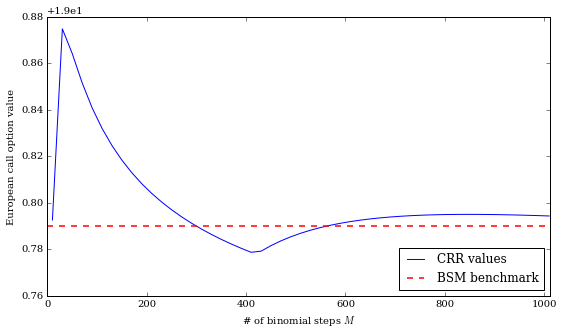

In [176]:
plot_convergence_call(10, 1011, 20)

Example 2 European Call:  mmin = 10, mmax = 1011 and step size = 25

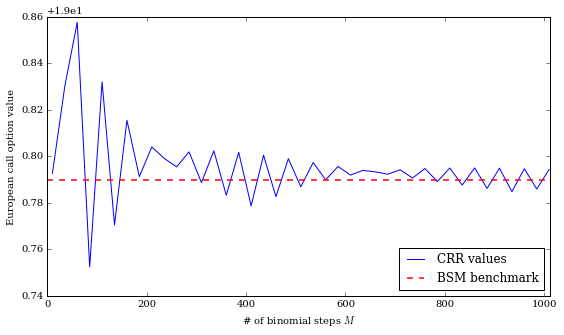

In [177]:
plot_convergence_call(10, 1011, 25)

Example 3 European Put:  mmin = 10, mmax = 1011 and step size = 20

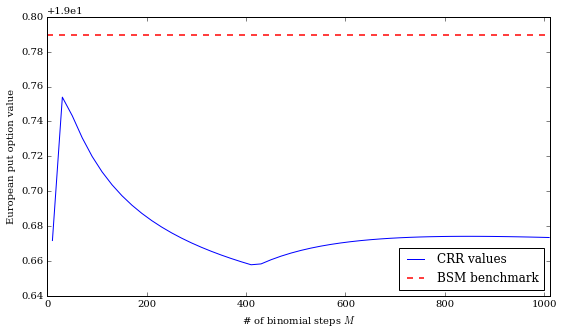

In [140]:
plot_convergence_put(10, 1011, 20)

Example 4 European Put:  mmin = 10, mmax = 1011 and step size = 25

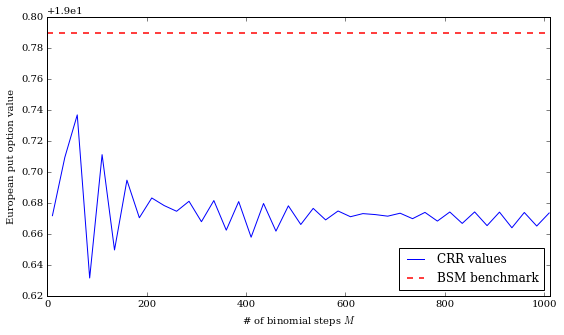

In [178]:
plot_convergence_put(10, 1011, 25)

# Chapter 6 : Fourier-based Options Pricing


# BSM Call Valuation via Fourier Approach

4.1 Comparison of Analytical, int_valueegral and FFT Approach

In [228]:
# Valuation of European Call Options in BSM Model
import numpy as np
from numpy.fft import fft
from scipy.integrate import quad
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

# Model Parameters
S0 = 100.00  # initial index level
K = 105.00  # strike level
T = 1.0  # call option maturity
r = 0.05  # constant short rate
sigma = 0.5  # constant volatility of diffusion


# Valuation by int_valueegration
# Analytical Formula

def BSM_call_value(S0, K, T, r, sigma):
    ''' Valuation of European call option in BSM Model.
    --> Analytical Formula.
    Parameters
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    sigma: float
        volatility factor in diffusion term
    Returns
    =======
    call_value: float
        European call option present value
    '''
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) \
        / (sigma * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - 0.5 * sigma ** 2) * T) \
        / (sigma * np.sqrt(T))
    BS_C = (S0 * stats.norm.cdf(d1, 0.0, 1.0) -
            K * np.exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    return BS_C

# Fourier Transform with Numerical int_valueegration
def BSM_call_value_INT(S0, K, T, r, sigma):
    ''' Valuation of European call option in BSM model via Lewis (2001)
    --> Fourier-based approach (integral).
    Parameters
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    sigma: float
        volatility factor in diffusion term
    Returns
    =======
    call_value: float
        European call option present value
    '''
    int_value = quad(lambda u:
                     BSM_integral_function(u, S0, K, T, r, sigma), 0, 100)[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) /
                     np.pi * int_value)
    return call_value


def BSM_integral_function(u, S0, K, T, r, sigma):
    ''' Valuation of European call option in BSM model via Lewis (2001)
    --> Fourier-based approach: integral function. '''
    cf_value = BSM_characteristic_function(u - 1j * 0.5, 0.0, T, r, sigma)
    int_value = 1 / (u ** 2 + 0.25) \
        * (np.exp(1j * u * np.log(S0 / K)) * cf_value).real
    return int_value


def BSM_characteristic_function(v, x0, T, r, sigma):
    '''  Valuation of European call option in BSM model via
    Lewis (2001) and Carr-Madan (1999)
    --> Fourier-based approach: charcteristic function. '''
    cf_value = np.exp(((x0 / T + r - 0.5 * sigma ** 2) * 1j * v -
                       0.5 * sigma ** 2 * v ** 2) * T)
    return cf_value

# Fourier Transform with FFT
def BSM_call_value_FFT(S0, K, T, r, sigma):
    ''' Valuation of European call option in BSM model via Lewis (2001)
    --> Fourier-based approach (integral).
    Parameters
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    sigma: float
        volatility factor in diffusion term
    Returns
    =======
    call_value: float
        European call option present value
    '''
    k = np.log(K / S0)
    x0 = np.log(S0 / S0)
    g = 1  # factor to increase accuracy
    N = g * 4096
    eps = (g * 150.) ** -1
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    u = np.arange(1, N + 1, 1)
    vo = eta * (u - 1)
    # Modificatons to Ensure int_valueegrability
    if S0 >= 0.95 * K:  # ITM case
        alpha = 1.5
        v = vo - (alpha + 1) * 1j
        modcharFunc = np.exp(-r * T) * (BSM_characteristic_function(
            v, x0, T, r, sigma) /
            (alpha ** 2 + alpha - vo ** 2 + 1j * (2 * alpha + 1) * vo))
    else:        # OTM case
        alpha = 1.1
        v = (vo - 1j * alpha) - 1j
        modcharFunc1 = np.exp(-r * T) * (1 / (1 + 1j * (vo - 1j * alpha)) -
                             np.exp(r * T) / (1j * (vo - 1j * alpha)) -
                             BSM_characteristic_function(v, x0, T, r, sigma) /
                             ((vo - 1j * alpha) ** 2 -
                              1j * (vo - 1j * alpha)))
        v = (vo + 1j * alpha) - 1j
        modcharFunc2 = np.exp(-r * T) * (1 / (1 + 1j * (vo + 1j * alpha))
                             - np.exp(r * T) /
                             (1j * (vo + 1j * alpha))
                             - BSM_characteristic_function(
            v, x0, T, r, sigma) /
            ((vo + 1j * alpha) ** 2 - 1j * (vo + 1j * alpha)))
    # Numerical FFT Routine
    delt = np.zeros(N, dtype=np.float)
    delt[0] = 1
    j = np.arange(1, N + 1, 1)
    SimpsonW = (3 + (-1) ** j - delt) / 3
    if S0 >= 0.95 * K:
        FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta * SimpsonW
        payoff = (fft(FFTFunc)).real
        CallValueM = np.exp(-alpha * k) / np.pi * payoff
    else:
        FFTFunc = (np.exp(1j * b * vo) *
                   (modcharFunc1 - modcharFunc2) *
                   0.5 * eta * SimpsonW)
        payoff = (fft(FFTFunc)).real
        CallValueM = payoff / (np.sinh(alpha * k) * np.pi)
    pos = int((k + b) / eps)
    CallValue = CallValueM[pos] * S0
    # klist = np.exp((np.arange(0, N, 1) - 1) * eps - b) * S0
    return CallValue  # , klist[pos - 50:pos + 50]


def plot_val_differences(vtype='int'):
    k_list = np.linspace(S0 * 0.6, S0 * 1.4, 50)
    ana_values = BSM_call_value(S0, k_list, T, r, sigma)
    plt.figure(figsize=(8, 6))
    plt.subplot(311)
    plt.plot(k_list, ana_values, 'b', label='analytical', lw=1.5)
    if vtype == 'int':
        int_values = np.array([BSM_call_value_INT(S0, K, T, r, sigma)
                               for K in k_list])
        plt.plot(k_list, int_values, 'r-.', label='Fourier (integral)', lw=1.5)
        diffs = int_values - ana_values
        rdiffs = (int_values - ana_values) / ana_values
    else:
        fft_values = np.array([BSM_call_value_FFT(S0, K, T, r, sigma)
                               for K in k_list])
        plt.plot(k_list, fft_values, 'r-.', label='Fourier (FFT)', lw=1.5)
        diffs = fft_values - ana_values
        rdiffs = (fft_values - ana_values) / ana_values
    plt.legend()
    plt.subplot(312)
    plt.plot(k_list, diffs, 'g', label='abs. difference', lw=1.5)
    plt.legend(loc=0)
    plt.subplot(313)
    plt.plot(k_list, rdiffs, 'r', label='rel. difference', lw=1.5)
    plt.legend(loc=0)
    plt.xlabel('strike')
    plt.tight_layout()

In [229]:
BSM_call_value(S0, K, T, r, sigma)

19.78984228873557

In [230]:
BSM_call_value_FFT(S0, K, T, r, sigma)

<ipython-input-228-955cfdc515f6>:147: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delt = np.zeros(N, dtype=np.float)


19.78984224622204

In [217]:
BSM_call_value_INT(S0, K, T, r, sigma)

19.789842288734803

4.2 Valuation accuracy 


Valuation accuracy of Lewis’ integral approach in comparison to BSM analytical formula; parameter values are S0 = 100, T = 1.0, r = 0.05, 𝜎 = 0.5

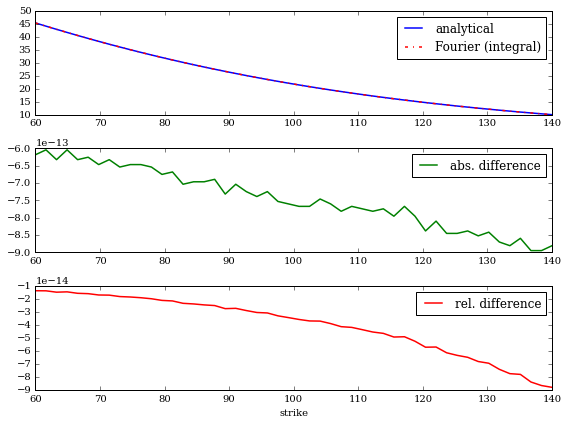

In [152]:
plot_val_differences('int')

Valuation accuracy of CM99 FFT approach in comparison to BSM analytical formula;
parameter values are S0 = 100, T = 1.0, r = 0.05, 𝜎 = 0.5, N = 4, 096, 𝜖 = 1/150

<ipython-input-214-2be06f5c6629>:154: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delt = np.zeros(N, dtype=np.float)


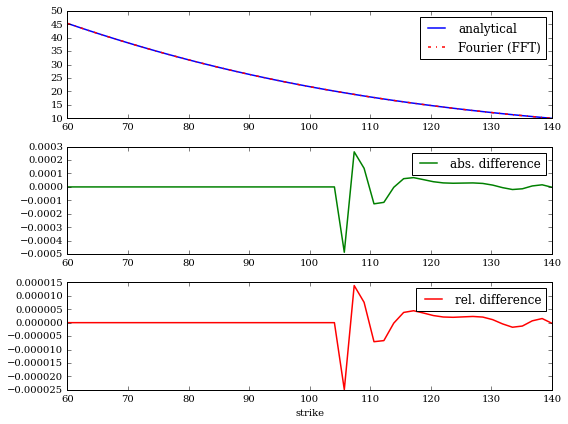

In [216]:
plot_val_differences('fft')

4.3    Speed Test of Fourier Analytical, FFT and Integral Approach

In [251]:
from time import time
t0 = time()
for _ in range(5000):
    BSM_call_value(S0, K, T, r, sigma)
t_analytical = time() - t0
print("fourier_Analytical_time:",t_analytical)

fourier_Analytical_time: 2.222771644592285


In [247]:
t0 = time()
for _ in range(5000):
    BSM_call_value_FFT(S0, K, T, r, sigma)
t_fft = time() - t0
print("Fourier_FFT_time:",t_fft)

<ipython-input-228-955cfdc515f6>:147: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  delt = np.zeros(N, dtype=np.float)


Fourier_FFT_time: 10.732449769973755


In [245]:
t0 = time()
for _ in range(5000):
    BSM_call_value_INT(S0, K, T, r, sigma)
t_integral = time() - t0
print("Fourier_Integral_time:",t_integral)

Fourier_Integral_time: 17.931379318237305


In [248]:
t_fft / t_analytical

4.919921574439361

In [249]:
t_integral / t_analytical

8.220022628390762

In [250]:
t_integral / t_fft

1.6707629388030347

# Fourier Series Transform - Numerical Evaluation

In [283]:
# Fourier Series for f(x) = abs(x) for -pi <= x <= pi
import numpy as np
import matplotlib.pyplot as plt
# Fourier series function
def fourier_series(x, n):
    ''' Generate Fourier Series from vector x for f(x) = abs(x)
    of order n.
    Parameters
    ==========
    x : float or array of floats
        input numbers
    n : int
        order of Fourier series
    Returns
    =======
    fourier_values : float or array of floats
        numbers according to Fourier series approximation
    '''
    fourier_values = np.pi / 2
    for i in range(1, n + 1):
        fourier_values += ((2 * ((-1) ** i - 1)) /
                           (np.pi * i ** 2) * np.cos(i * x))
    return fourier_values


def plot_fourier_series():
    # Data Generation
    x = np.linspace(-np.pi, np.pi, 100)
    y1 = fourier_series(x, 2)
    y2 = fourier_series(x, 8)
   

    # Data Plotting
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.plot(x, abs(x), 'b', label='$f(x) = |x|$')
    plt.plot(x, y1, 'r-.', lw=3.0, label='Fourier series $n=2$')
    plt.legend(loc=9)
    plt.subplot(122)
    plt.plot(x, abs(x), 'b', label='$f(x) = |x|$')
    plt.plot(x, y2, 'r-.', lw=3.0, label='Fourier series $n=8$')
    plt.style.use('seaborn')
    plt.legend(loc=9)
    

Fourier series approximation of function f (x) = |x| of order 2 (left) and of order 8 (right)

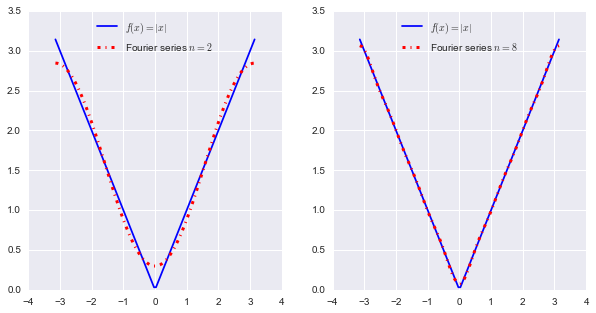

In [284]:
plot_fourier_series()

Fourier series approximation of function f (x) = |x^2| of order 1 (left) and of order 9 (right)

In [294]:
# Fourier Series for f(x) = abs(x^2) for -pi <= x^2 <= pi
import numpy as np
import matplotlib.pyplot as plt
# Fourier series function
def fourier_series(x, n):
    ''' Generate Fourier Series from vector x for f(x) = abs(x^2)
    of order n.
    Parameters
    ==========
    x : float or array of floats
        input numbers
    n : int
        order of Fourier series
    Returns
    =======
    fourier_values : float or array of floats
        numbers according to Fourier series approximation
    '''
    fourier_values = np.pi / 2
    for i in range(1, n + 1):
        fourier_values += ((2 * ((-1) ** i - 1)) /
                           (np.pi * i ** 2) * np.cos(i * x))
    return fourier_values


def plot_fourier_series():
    # Data Generation
    x = np.linspace(-np.pi, np.pi, 100)
    y1 = fourier_series(x, 1)
    y2 = fourier_series(x, 9)
   

    # Data Plotting
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.plot(x, abs(pow(x,2)) , 'b', label='$f(x) = |x^2|$')
    plt.plot(x, y1, 'r-.', lw=3.0, label='Fourier series $n=1$')
    plt.legend(loc=9)
    plt.subplot(122)
    plt.plot(x, abs(pow(x,2)), 'b', label='$f(x) = |x^2|$')
    plt.plot(x, y2, 'r-.', lw=3.0, label='Fourier series $n=9$')
    plt.style.use('seaborn')
    plt.legend(loc=9)

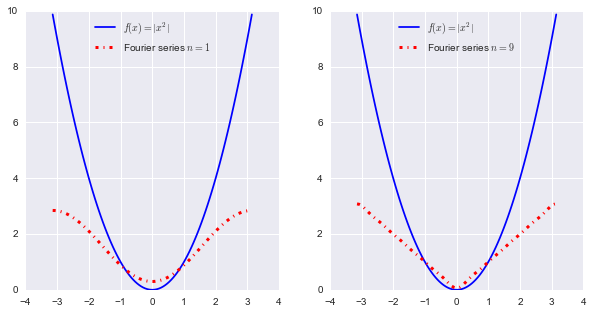

In [295]:
plot_fourier_series()

# Root of Unity : Discrete Fourier Transform

In [224]:
# Plotting Spokes and Points on a Circle
# with Complex Numbers
import numpy as np
import matplotlib.pyplot as plt


def generate_subplot(n):
    y = np.exp(1j * 2 * np.pi / n) ** np.arange(1, n + 1)
    for l in range(n):
        plt.plot(y[l].real, y[l].imag, 'ro')
        plt.plot((0, y[l].real), (0.0, y[l].imag), 'b')
    plt.axis([-1.1, 1.1, -1.1, 1.1])
    plt.xlabel('$n=%s$' % n)


def generate_plot():
    plt.figure(figsize=(10, 7))
    # first sub-plot for n=7
    plt.subplot(121)
    generate_subplot(n=7)

    # second sub-plot for n=35
    plt.subplot(122)
    generate_subplot(n=35)
    plt.subplots_adjust(left=0.05, bottom=0.2, top=0.8, right=1.0)

Series with roots of unity for n = 7 and n = 35 plotted in the imaginary plane

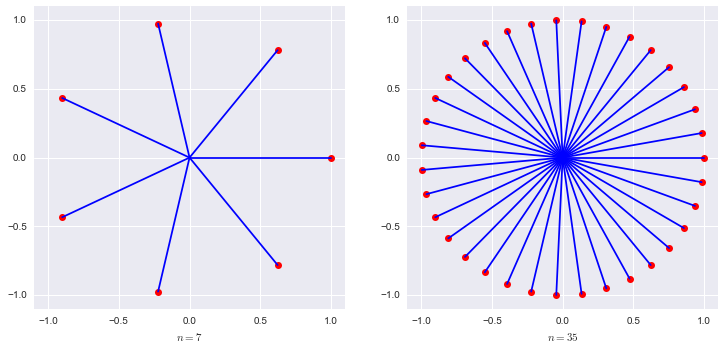

In [226]:
generate_plot()

# Convolution

In [253]:
# Circular convolution of two 1-dim vectors
import numpy as np
# Function Definitions

def revpy(a):
    ''' Reversing the order of the vector's numbers (for loop). '''
    a = np.array(a)
    n = len(a)
    c = np.zeros(n, dtype=np.float)
    c[0] = a[0]
    for j in range(1, n):
        c[j] = a[n - j]
    return c


def convolution(a, b):
    ''' Convolution of two vectors. '''
    if len(a) != len(b):
        raise ValueError("Lengths of vectors do not match.")
    n = len(a)
    c = np.zeros(n, dtype=np.float)
    for j in range(n):
        s = 0
        for k in range(n):
            if j - k >= 0:
                s += a[j - k] * b[k]
            else:
                s += a[j - k + n] * b[k]
        c[j] = s
    return c

In [254]:
a = np.arange(10)
revpy(a)

<ipython-input-253-7adf8f2a37e8>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c = np.zeros(n, dtype=np.float)


array([0., 9., 8., 7., 6., 5., 4., 3., 2., 1.])

In [274]:
clin = convolution(a, a)
convolution(a, a)

<ipython-input-253-7adf8f2a37e8>:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c = np.zeros(n, dtype=np.float)


array([165., 200., 225., 240., 245., 240., 225., 200., 165., 120.])

# Module with Parameters 

In [272]:
# Model Parameters for European Call Option in Binomial Model
!pip install parameters
from math import exp, sqrt

# Model and Option Parameters
S0 = 100.0  # index level
K = 105.0  # option strike
T = 1.0  # maturity date
r = 0.05  # risk-less short rate
sigma = 0.5  # volatility


def get_binomial_parameters(M=100):
    # Time Parameters
    dt = T / M  # length of time interval
    df = exp(-r * dt)  # discount per interval

    # Binomial Parameters
    u = exp(sigma * sqrt(dt))  # up movement
    d = 1 / u  # down movement
    q = (exp(r * dt) - d) / (u - d)  # martingale branch probability
    return dt, df, u, d, q


# Call Value by Convolution

Assuming m = 3 steps

In [300]:
# Call Option Pricing with Circular Convolution (Simple)
import math
import numpy as np
#from convolution import revnp, convolution

# Parameter Definitions
M = 3 # number of time steps
dt = 1.0 / M  # length of time interval
r = 0.05  # constant short rate
C = [49.18246976, 22.14027582, 0, 0]  # call payoff at maturity
q = 0.537808372  # martingale probability
qv = np.array([q, 1 - q, 0, 0])  # probabilitiy vector filled with zeros

# Calculation
V = np.zeros((M + 1, M + 1), dtype=np.float)
V[M] = C

for t in range(M - 1, -1, -1):
    V[t] = convolution(V[t + 1], revnp(qv)) * math.exp(-r * dt)

print("Value of the Call Option with Circular Convolution %0.3f" % V[0, 0])

Value of the Call Option with Circular Convolution 15.724


<ipython-input-300-3d34854a4377>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  V = np.zeros((M + 1, M + 1), dtype=np.float)
<ipython-input-253-7adf8f2a37e8>:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c = np.zeros(n, dtype=np.float)


# Option Pricing by Convolution

In [301]:
# Call Option Pricing with Circular Convolution (General)
import numpy as np
#from convolution import revnp, convolution
from parameters import *

# Parmeter Adjustments
M = 3  # number of time steps
dt, df, u, d, q = get_binomial_parameters(M)

# Array Generation for Stock Prices
mu = np.arange(M + 1)
mu = np.resize(mu, (M + 1, M + 1))
md = np.transpose(mu)
mu = u ** (mu - md)
md = d ** md
S = S0 * mu * md

# Valuation
V = np.maximum(S - K, 0)
qv = np.zeros((M + 1), dtype=np.float)
qv[0] = q
qv[1] = 1 - q
for t in range(M - 1, -1, -1):
    V[:, t] = convolution(V[:, t + 1], revnp(qv)) * df

print("Value of the Call Option %0.3f" % V[0, 0])

Value of the Call Option 21.268


<ipython-input-301-d9330cafe791>:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  qv = np.zeros((M + 1), dtype=np.float)
<ipython-input-253-7adf8f2a37e8>:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c = np.zeros(n, dtype=np.float)


In [276]:
dt, df, u, d, q, S0, K, T, r, sigma

(0.25,
 0.9834714538216175,
 1.3346580738566722,
 0.7492555730849976,
 0.537808372,
 100.0,
 105.0,
 1.0,
 0.05,
 0.5)

Array generation for Stock Prices

In [269]:
S

array([[100.        , 133.46580739, 178.13121741, 237.74426752],
       [ 56.13839138,  74.92555731, 100.        , 133.46580739],
       [ 31.51518987,  42.06200261,  56.13839138,  74.92555731],
       [ 17.69212063,  23.61293164,  31.51518987,  42.06200261]])

In [270]:
V

array([[ 21.26773246,  40.48365047,  74.86671476, 132.74426752],
       [ 22.79710369,   5.75109109,  12.79489942,  28.46580739],
       [ 55.3746868 ,  37.85117293,   0.        ,   0.        ],
       [ 53.90824382,  71.83906553,  70.88389256,   0.        ]])

# Option Pricing by DFT

In [302]:
# Call Option Pricing with Discrete Fourier Transforms (DFT/FFT)
import math
import numpy as np
from numpy.fft import fft, ifft
#from convolution import revnp
from parameters import *

# Parmeter Adjustments
M = 3  # number of time steps
dt, df, u, d, q = get_binomial_parameters(M)

# Array Generation for Stock Prices
mu = np.arange(M + 1)
mu = np.resize(mu, (M + 1, M + 1))
md = np.transpose(mu)
mu = u ** (mu - md)
md = d ** md
S = S0 * mu * md

# Valuation by fft
CT = np.maximum(S[:, -1] - K, 0)
qv = np.zeros(M + 1, dtype=np.float)
qv[0] = q
qv[1] = 1 - q
C0_a = fft(math.exp(-r * T) * ifft(CT) * ((M + 1) * ifft(revnp(qv))) ** M)
C0_b = fft(math.exp(-r * T) * ifft(CT) * fft(qv) ** M)
C0_c = ifft(math.exp(-r * T) * fft(CT) * fft(revnp(qv)) ** M)

# Results Output
print("Value of European option is %0.3f" % np.real(C0_a[0]))
print("Value of European option is %0.3f" % np.real(C0_b[0]))
print("Value of European option is %0.3f" % np.real(C0_c[0]))

Value of European option is 21.268
Value of European option is 21.268
Value of European option is 21.268


<ipython-input-302-d60e60392b57>:23: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  qv = np.zeros(M + 1, dtype=np.float)


In [31]:
dt, df, u, d, q, S0, K, T, r, sigma

(0.3333333333333333,
 0.9834714538216175,
 1.1224009024456676,
 0.8909472522884107,
 0.5437765963610321,
 100.0,
 100.0,
 1.0,
 0.05,
 0.2)

# Speed Test of DFT

In [318]:
#Call Option Pricing with DFT/FFT Speed Test
import math
import numpy as np
from numpy.fft import fft, ifft
#from convolution import revnp
from parameters import *
def call_fft_value(M):
# Parameter Adjustments
    dt, df, u, d, q = get_binomial_parameters(M)
    # Array Generation for Stock Prices
    mu = np.arange(M + 1)
    mu = np.resize(mu, (M + 1, M + 1))
    md = np.transpose(mu)
    mu = u ** (mu - md)
    md = d ** md
    S = S0 * mu * md
   # 
# Valuation by FFT
    CT = np.maximum(S[:, -1] - K, 0)
    qv = np.zeros(M + 1, dtype=np.float)
    qv[0] = q
    qv[1] = 1 - q
    C0 = fft(math.exp(-r * T) * ifft(CT) * fft(qv) ** M)
print("Speed Test of DFT is" ,np.real(C0))

Speed Test of DFT is [21.26773246 22.79710369 55.3746868  53.90824382]
